In [1]:
pip install diffusers transformers torch

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install google-auth

In [3]:
pip install --upgrade protobuf

Note: you may need to restart the kernel to use updated packages.


In [4]:
from diffusers import StableDiffusionPipeline
import torch

C:\Anaconda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Load the model
model_id = "runwayml/stable-diffusion-v1-5"
device = "cuda" if torch.cuda.is_available() else "cpu"

In [6]:
# Initialize pipeline
pipeline = StableDiffusionPipeline.from_pretrained(model_id).to(device)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Loading pipeline components...: 100%|████████████████████████████████████████████████████| 7/7 [00:12<00:00,  1.73s/it]


In [7]:
# Define a text prompt
prompt = "a serene sunset over a futuristic city, ultra-realistic, cinematic lighting"

In [8]:
# Generate and save images
for i in range(3):  # Generating 3 images
    image = pipeline(prompt).images[0]  # Generate image
    image.save(f"generated_image_{i+1}.png")  # Save to disk
    print(f"Image {i+1} saved as 'generated_image_{i+1}.png'")

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [06:40<00:00,  8.02s/it]


Image 1 saved as 'generated_image_1.png'


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [06:55<00:00,  8.31s/it]


Image 2 saved as 'generated_image_2.png'


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [06:26<00:00,  7.72s/it]


Image 3 saved as 'generated_image_3.png'


In [9]:
pip install matplotlib

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

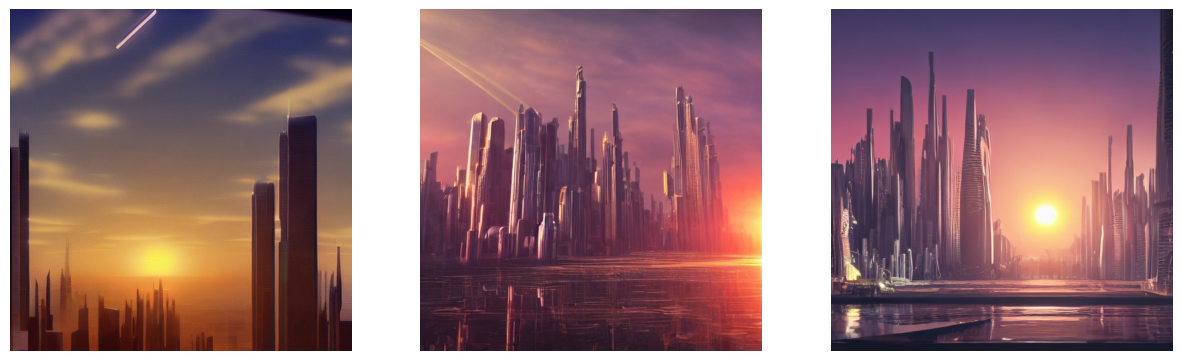

In [11]:
# Load and display the generated images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    img = Image.open(f"generated_image_{i+1}.png")
    axes[i].imshow(img)
    axes[i].axis("off")
plt.show()

In [12]:
pip install pillow torchvision

Note: you may need to restart the kernel to use updated packages.


In [13]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os

In [14]:
# Define preprocessing steps
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224 pixels
    transforms.ToTensor(),  # Convert image to tensor (scales values to [0,1])
])

In [15]:
# Directory to save preprocessed images
output_dir = "preprocessed_images"
os.makedirs(output_dir, exist_ok=True)

In [16]:
# Load and preprocess images
for i in range(3):  
    image_path = f"generated_image_{i+1}.png"
    image = Image.open(image_path)  # Load image

    # Apply preprocessing
    processed_image = preprocess(image)

    # Convert tensor back to image for saving
    processed_pil = transforms.ToPILImage()(processed_image)

    # Save processed images
    processed_pil.save(f"{output_dir}/processed_image_{i+1}.png")

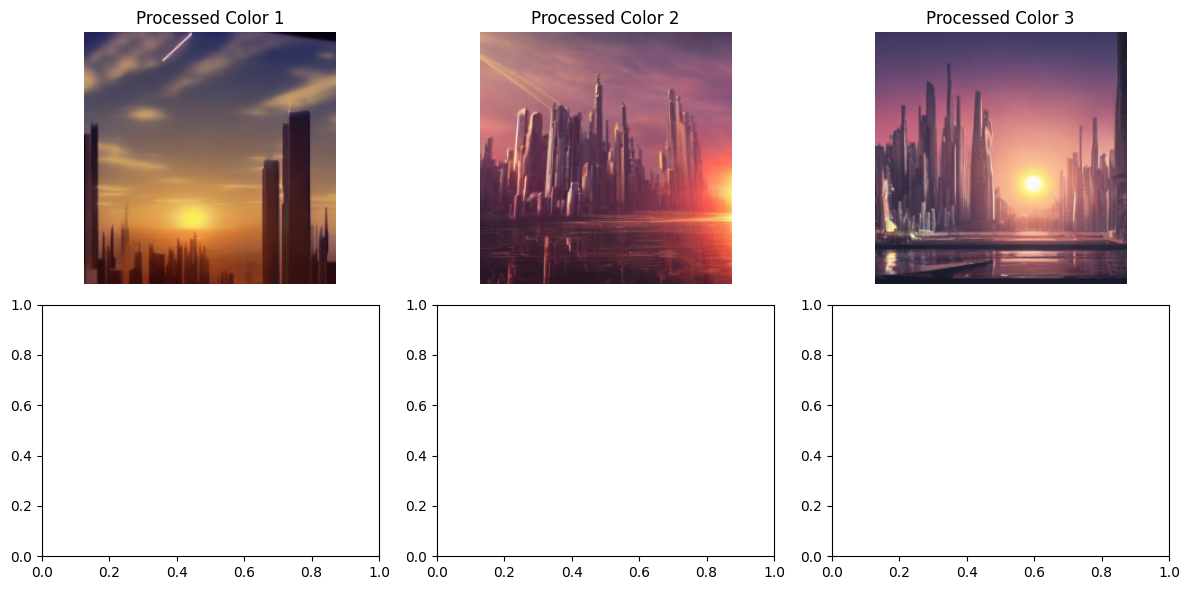

In [17]:
# Load and display processed images
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

for i in range(3):
    img_color = Image.open(f"{output_dir}/processed_image_{i+1}.png")

    axes[0, i].imshow(img_color)
    axes[0, i].set_title(f"Processed Color {i+1}")
    axes[0, i].axis("off")

plt.tight_layout()
plt.show()